# Lockman SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
04829ed (Thu Nov 2 16:57:19 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_lockman-swire_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_lockman-swire_20170817.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

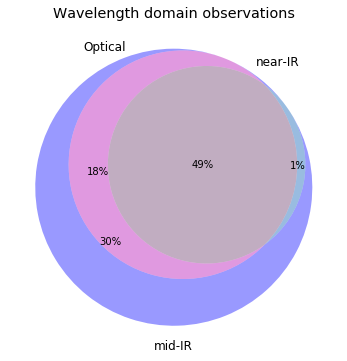

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

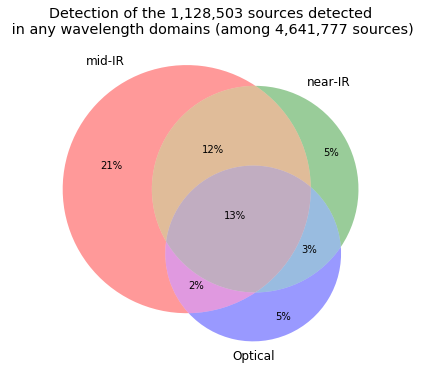

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u",          "CFHT Megacam u"]
g_bands = ["WFC g", "RCS g", "CFHT Megacam g",  "GPC1 g"]
r_bands = ["WFC r", "RCS r", "CFHT Megacam r",  "GPC1 r"]
i_bands = ["WFC i", "RCS i",                    "GPC1 i"]
z_bands = ["WFC z", "RCS z", "CFHT Megacam z",  "GPC1 z"]
y_bands = [         "RCS y",                    "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

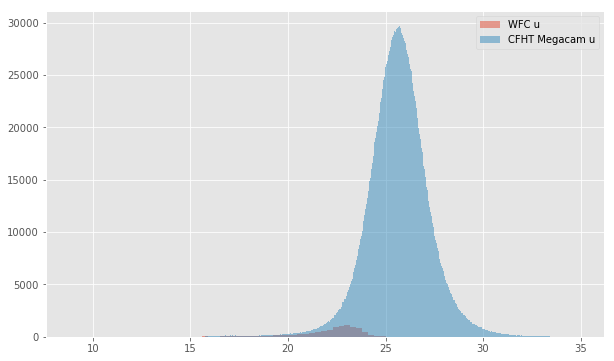

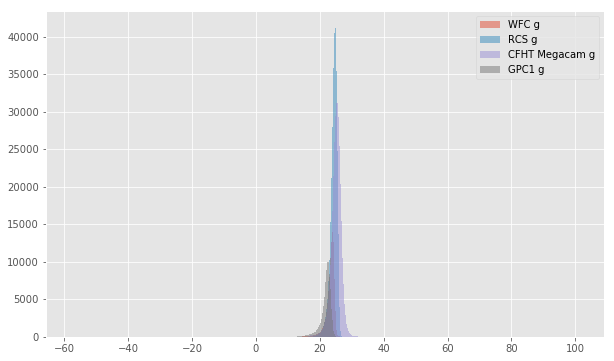

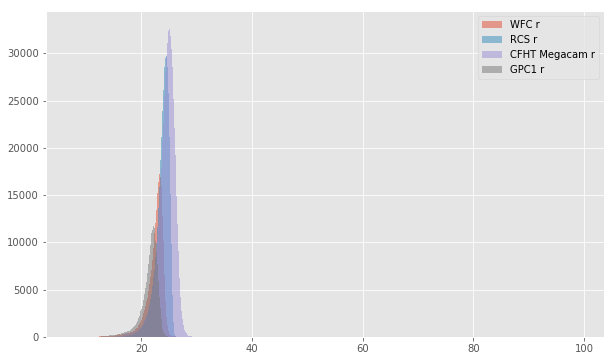

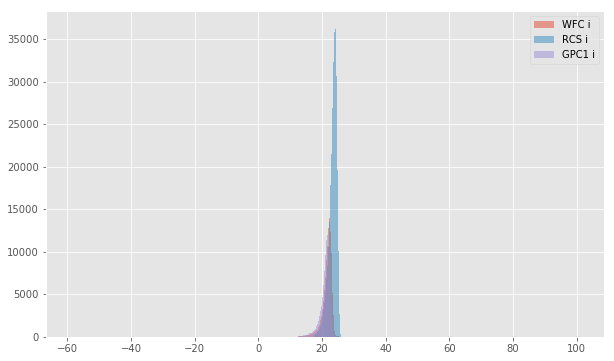

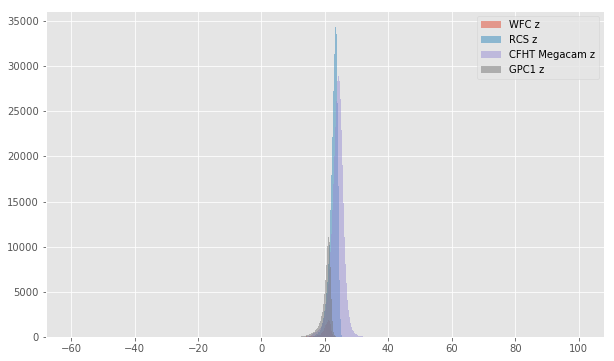

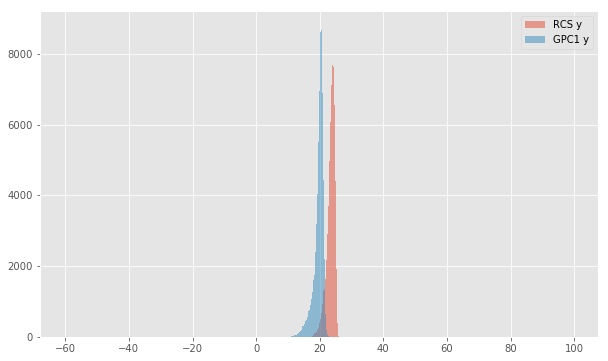

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

CFHT Megacam u (aperture) - WFC u (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.25
- 1% percentile: -0.94939359664917
- 99% percentile: 3.2226499748230046


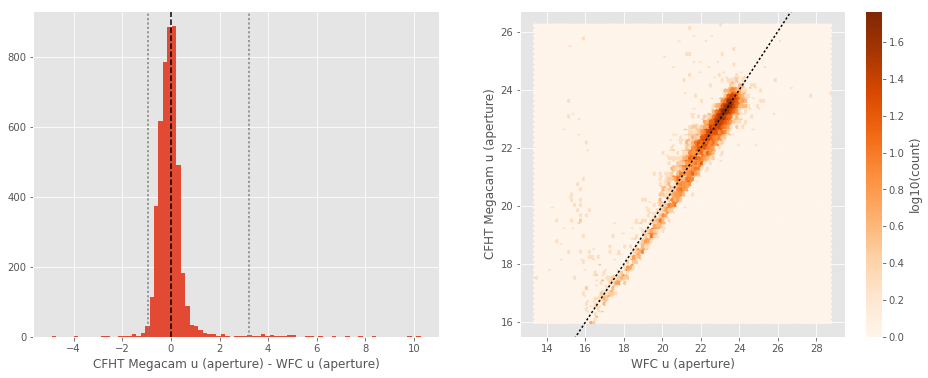

CFHT Megacam u (total) - WFC u (total):
- Median: -0.27
- Median Absolute Deviation: 0.21
- 1% percentile: -1.6238471603393554
- 99% percentile: 1.9827452659606981


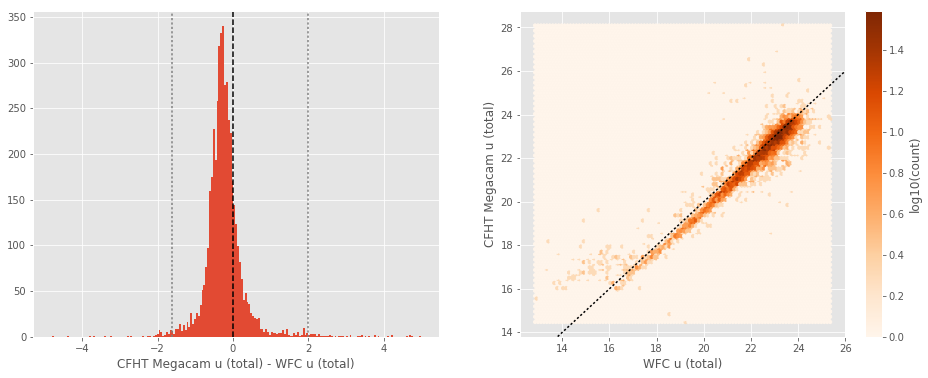

No sources have both WFC g (aperture) and RCS g (aperture) values.
RCS g (total) - WFC g (total):
- Median: -0.08
- Median Absolute Deviation: 0.18
- 1% percentile: -0.951687240600586
- 99% percentile: 1.1384436035156251


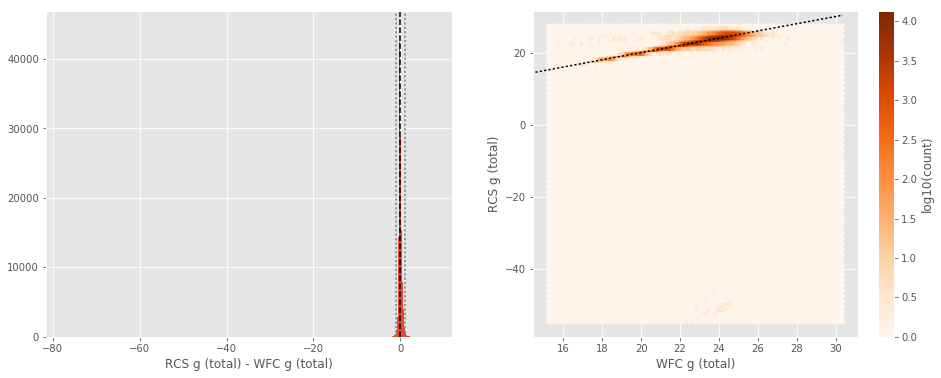

CFHT Megacam g (aperture) - WFC g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.14
- 1% percentile: -0.5077003479003905
- 99% percentile: 0.8677662658691405


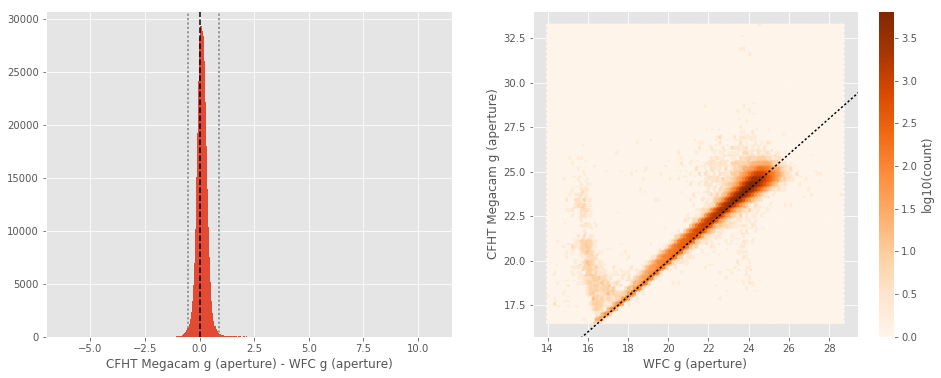

CFHT Megacam g (total) - WFC g (total):
- Median: -0.04
- Median Absolute Deviation: 0.15
- 1% percentile: -0.8756649780273438
- 99% percentile: 1.4227341461181653


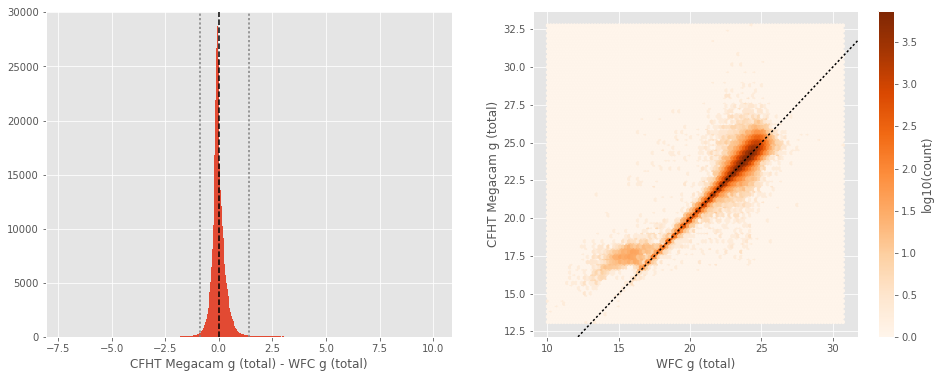

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.25
- 1% percentile: -1.6477296829223633
- 99% percentile: 2.3155704498290794


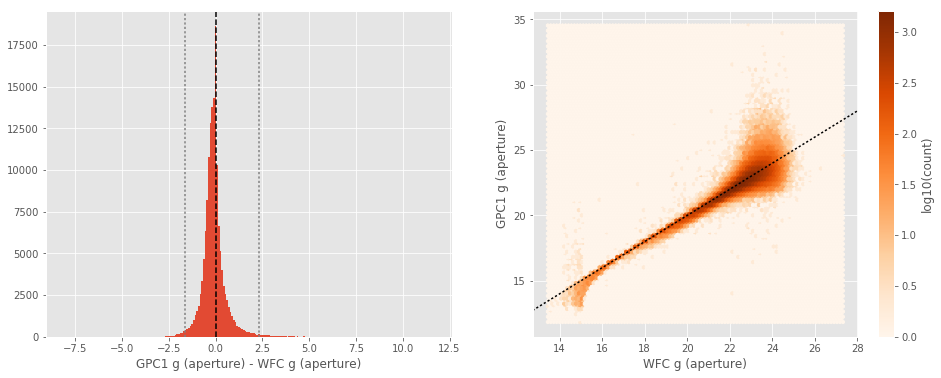

GPC1 g (total) - WFC g (total):
- Median: -0.02
- Median Absolute Deviation: 0.18
- 1% percentile: -2.03228515625
- 99% percentile: 0.8685866928100586


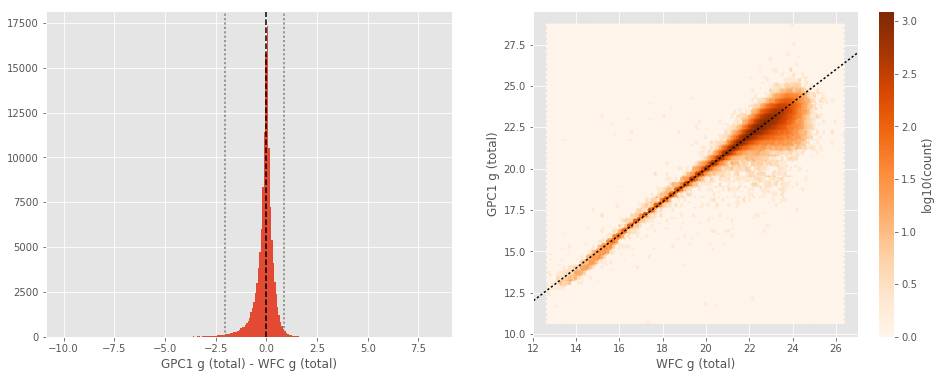

No sources have both RCS g (aperture) and CFHT Megacam g (aperture) values.
CFHT Megacam g (total) - RCS g (total):
- Median: 0.05
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0380179977416992
- 99% percentile: 1.2724957084655744


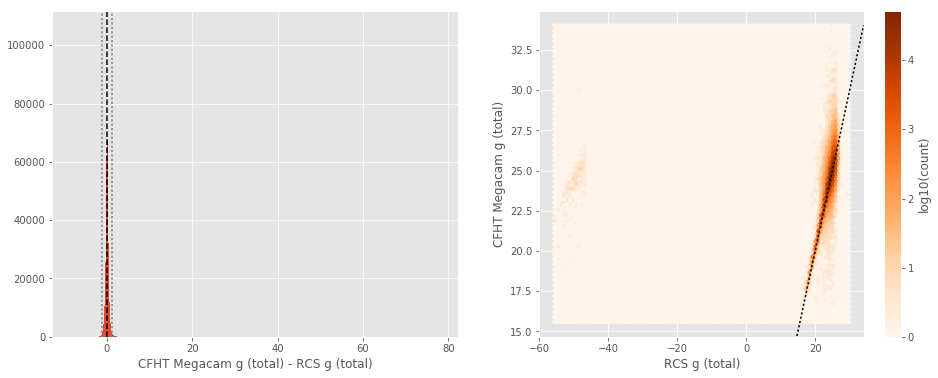

No sources have both RCS g (aperture) and GPC1 g (aperture) values.
GPC1 g (total) - RCS g (total):
- Median: 0.09
- Median Absolute Deviation: 0.20
- 1% percentile: -2.1646539306640626
- 99% percentile: 0.9680083465576188


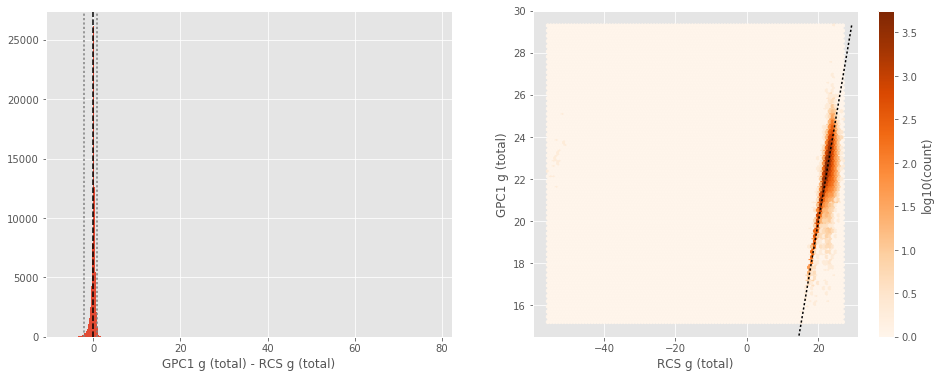

GPC1 g (aperture) - CFHT Megacam g (aperture):
- Median: -0.27
- Median Absolute Deviation: 0.35
- 1% percentile: -2.4312880706787108
- 99% percentile: 2.318428840637206


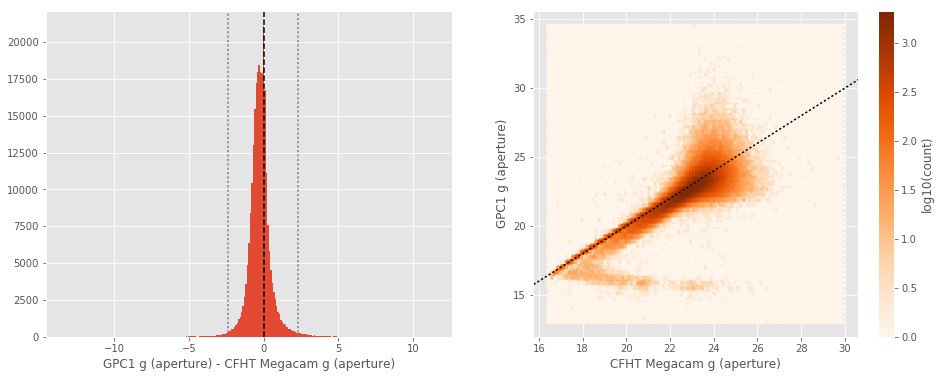

GPC1 g (total) - CFHT Megacam g (total):
- Median: 0.05
- Median Absolute Deviation: 0.18
- 1% percentile: -2.6805446624755858
- 99% percentile: 0.911133003234862


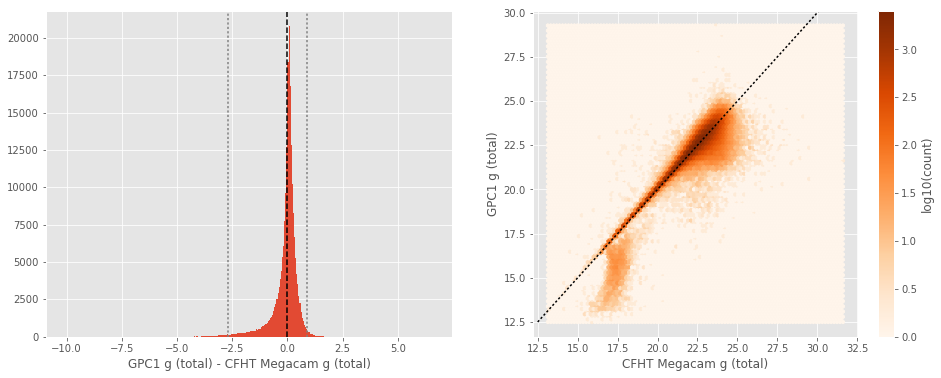

No sources have both WFC r (aperture) and RCS r (aperture) values.
RCS r (total) - WFC r (total):
- Median: -0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -1.020458526611328
- 99% percentile: 1.0779574584960954


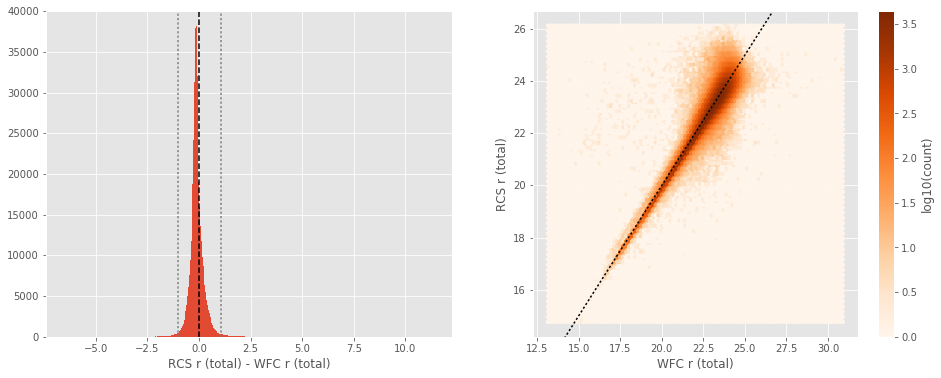

CFHT Megacam r (aperture) - WFC r (aperture):
- Median: 0.12
- Median Absolute Deviation: 0.15
- 1% percentile: -0.5452775573730468
- 99% percentile: 1.1373986816406252


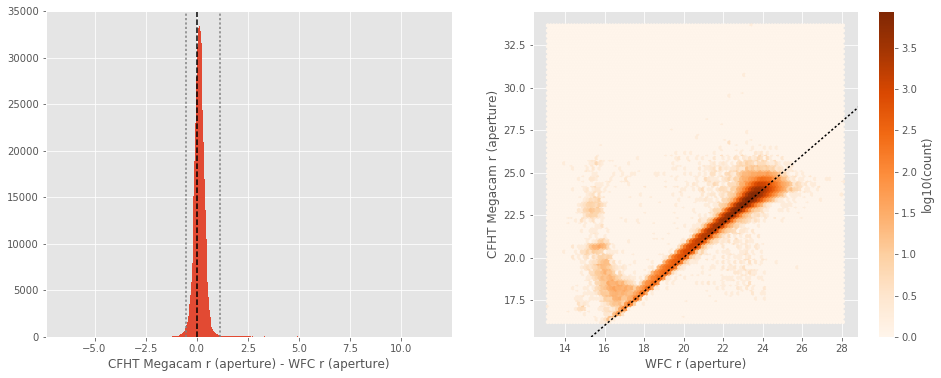

CFHT Megacam r (total) - WFC r (total):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9584978103637695
- 99% percentile: 1.5919403076171919


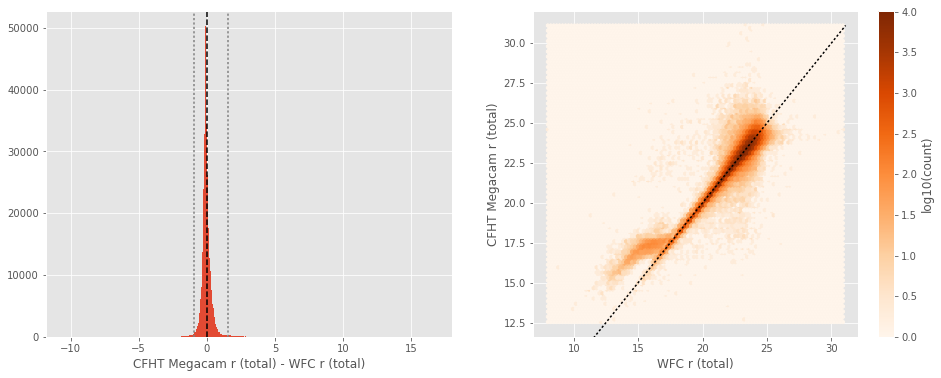

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -1.083700180053711
- 99% percentile: 1.2235185241699347


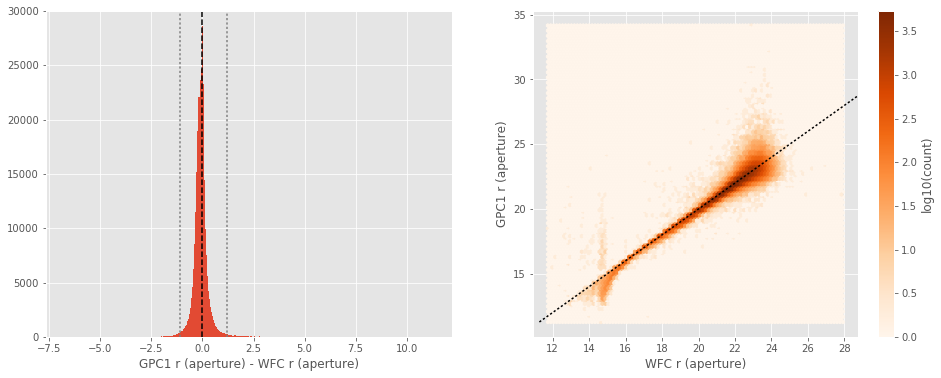

GPC1 r (total) - WFC r (total):
- Median: 0.01
- Median Absolute Deviation: 0.13
- 1% percentile: -1.3796411895751954
- 99% percentile: 0.8283004760742188


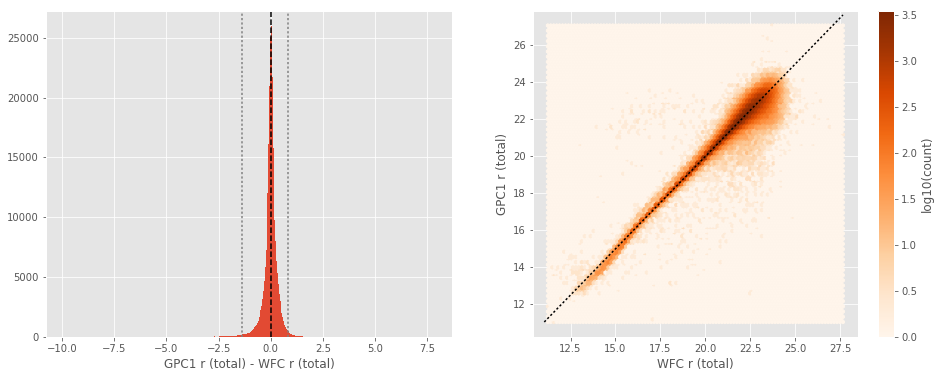

No sources have both RCS r (aperture) and CFHT Megacam r (aperture) values.
CFHT Megacam r (total) - RCS r (total):
- Median: 0.07
- Median Absolute Deviation: 0.17
- 1% percentile: -1.0872340965270995
- 99% percentile: 1.341750965118408


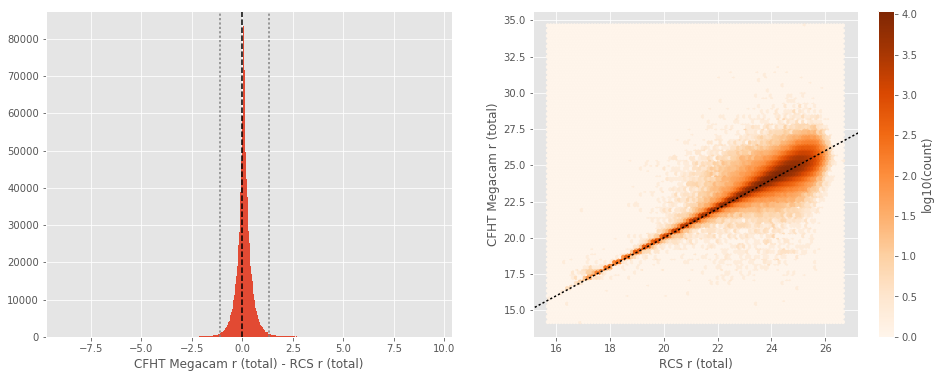

No sources have both RCS r (aperture) and GPC1 r (aperture) values.
GPC1 r (total) - RCS r (total):
- Median: 0.15
- Median Absolute Deviation: 0.12
- 1% percentile: -1.4188003540039062
- 99% percentile: 0.8836927032470658


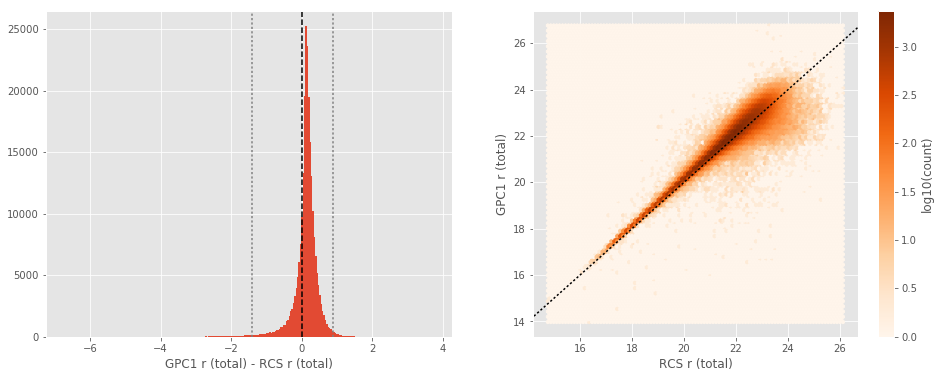

GPC1 r (aperture) - CFHT Megacam r (aperture):
- Median: -0.23
- Median Absolute Deviation: 0.24
- 1% percentile: -2.0773930168151855
- 99% percentile: 1.1670617103576837


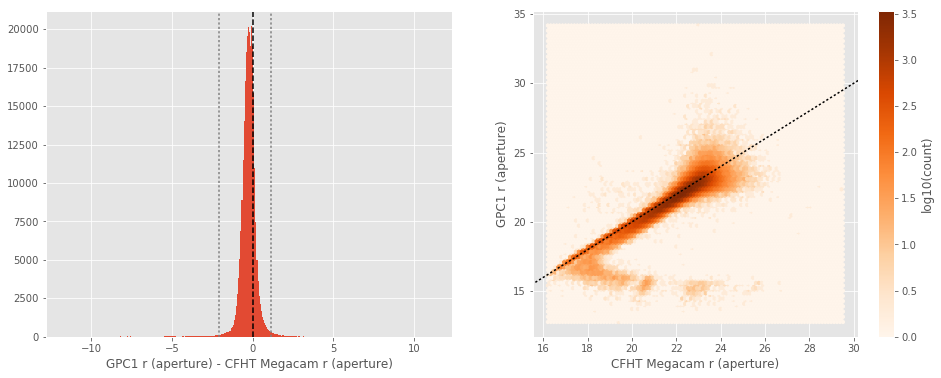

GPC1 r (total) - CFHT Megacam r (total):
- Median: 0.09
- Median Absolute Deviation: 0.12
- 1% percentile: -2.179352283477783
- 99% percentile: 0.8217307281494138


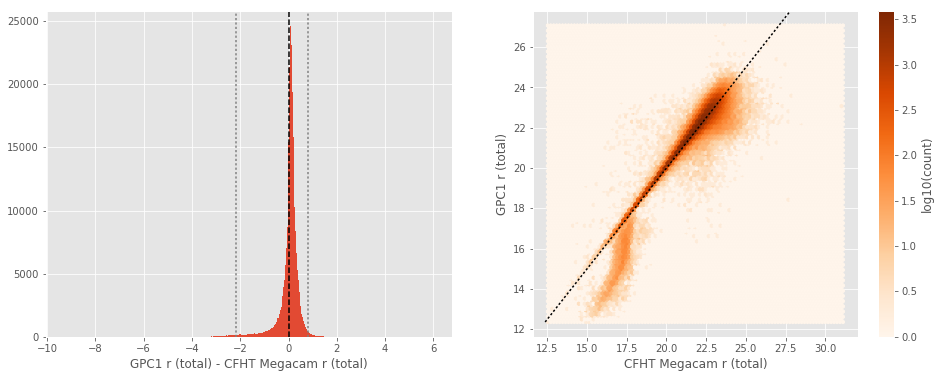

No sources have both WFC i (aperture) and RCS i (aperture) values.
RCS i (total) - WFC i (total):
- Median: -0.08
- Median Absolute Deviation: 0.20
- 1% percentile: -0.9838282966613769
- 99% percentile: 1.3779298400878914


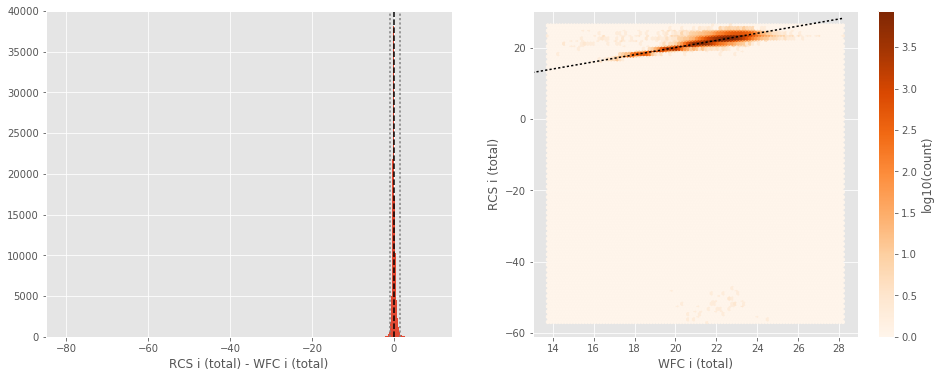

GPC1 i (aperture) - WFC i (aperture):
- Median: -0.01
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8346004486083984
- 99% percentile: 1.213294830322265


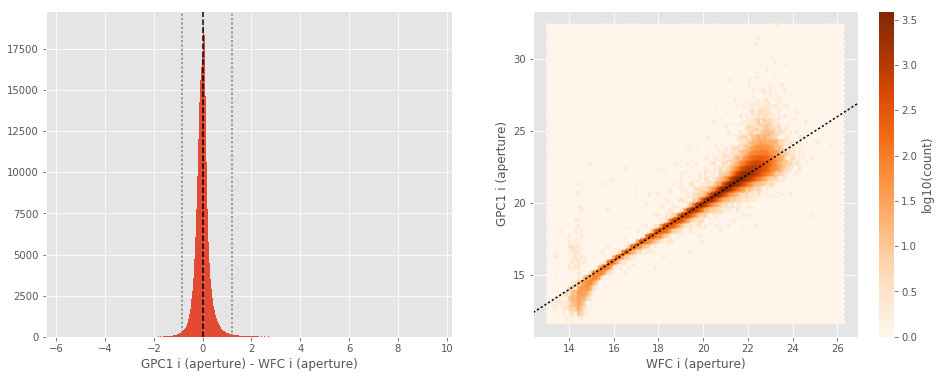

GPC1 i (total) - WFC i (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8180191040039062
- 99% percentile: 1.0501995086669922


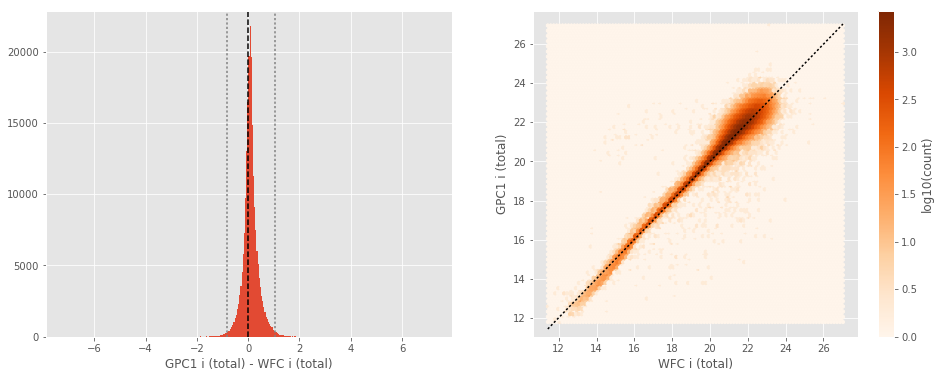

No sources have both RCS i (aperture) and GPC1 i (aperture) values.
GPC1 i (total) - RCS i (total):
- Median: 0.20
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6361136627197265
- 99% percentile: 0.8754997253417969


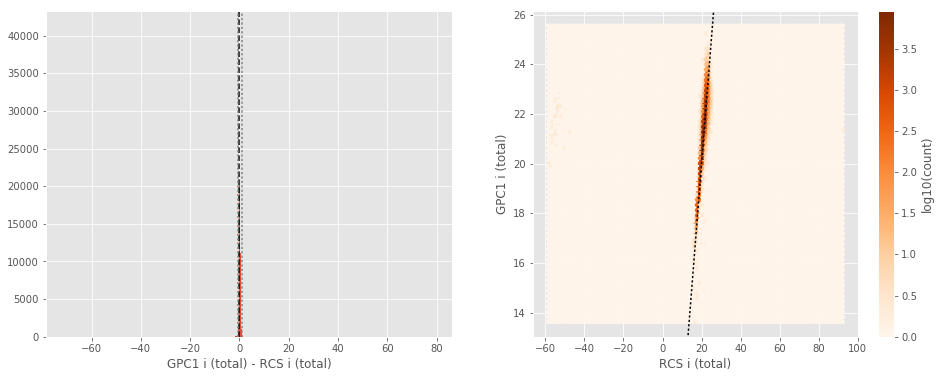

No sources have both WFC z (aperture) and RCS z (aperture) values.
RCS z (total) - WFC z (total):
- Median: -0.05
- Median Absolute Deviation: 0.24
- 1% percentile: -1.0027453994750977
- 99% percentile: 1.752888126373291


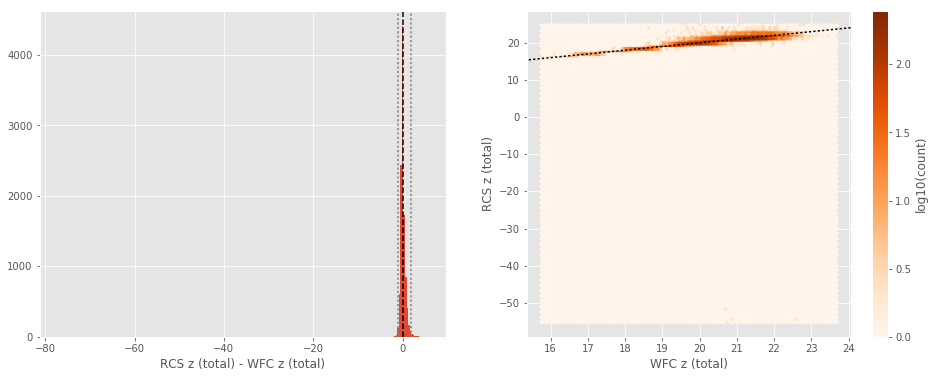

CFHT Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -0.6399097442626953
- 99% percentile: 3.041360149383542


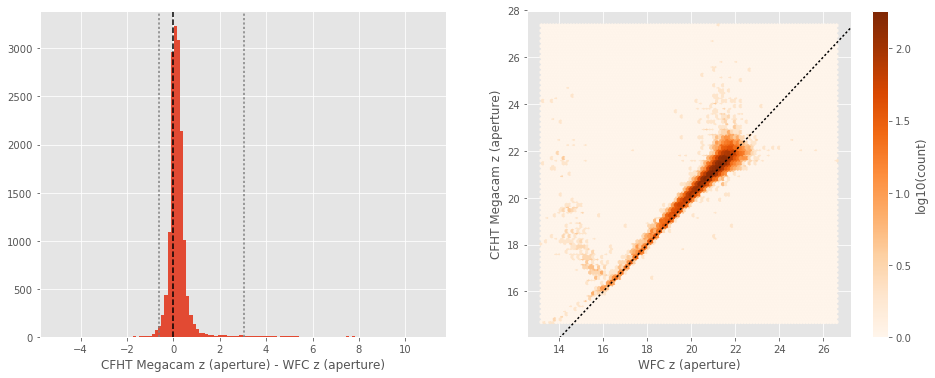

CFHT Megacam z (total) - WFC z (total):
- Median: -0.04
- Median Absolute Deviation: 0.22
- 1% percentile: -0.9714330673217774
- 99% percentile: 2.1101235580444326


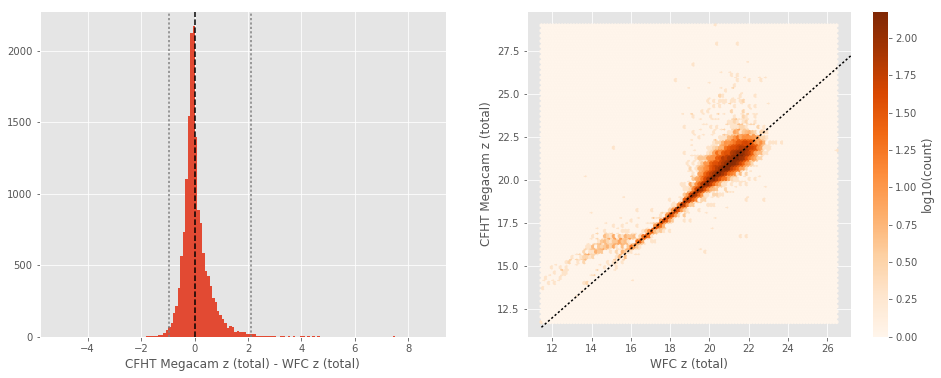

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.02
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8126788330078125
- 99% percentile: 1.2011602020263696


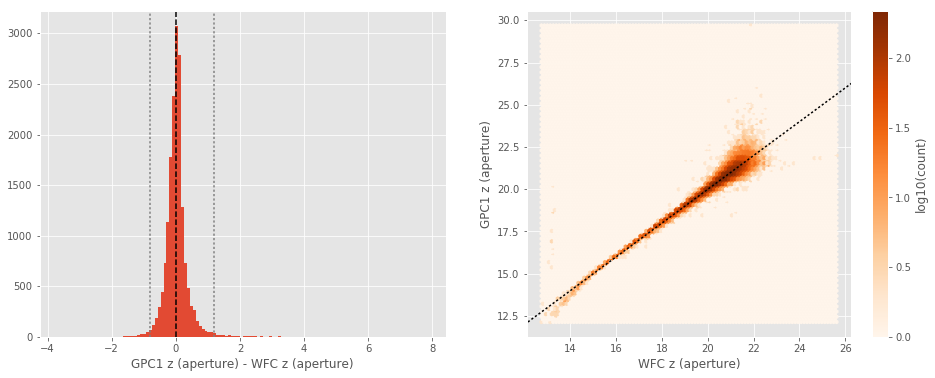

GPC1 z (total) - WFC z (total):
- Median: 0.10
- Median Absolute Deviation: 0.19
- 1% percentile: -0.8380362510681152
- 99% percentile: 1.3818613624572755


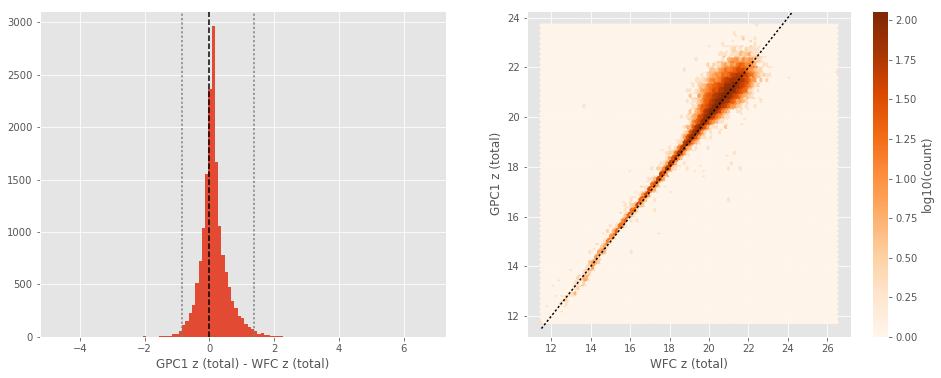

No sources have both RCS z (aperture) and CFHT Megacam z (aperture) values.
CFHT Megacam z (total) - RCS z (total):
- Median: 0.05
- Median Absolute Deviation: 0.24
- 1% percentile: -1.2459497833251953
- 99% percentile: 2.295762405395507


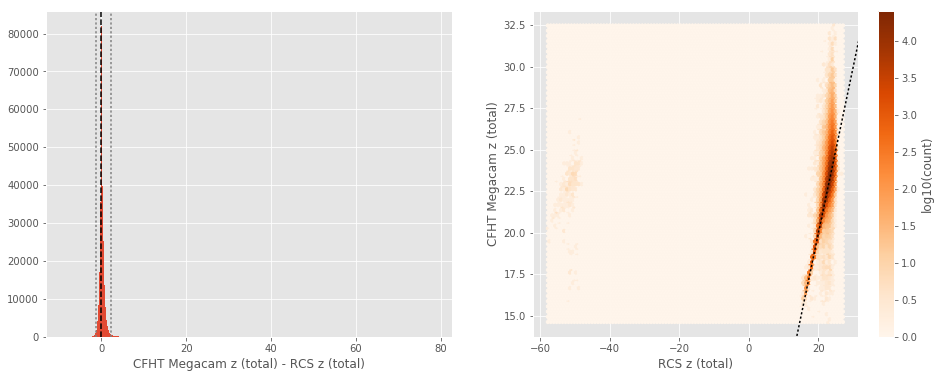

No sources have both RCS z (aperture) and GPC1 z (aperture) values.
GPC1 z (total) - RCS z (total):
- Median: 0.18
- Median Absolute Deviation: 0.13
- 1% percentile: -0.7215998649597168
- 99% percentile: 0.9408991813659668


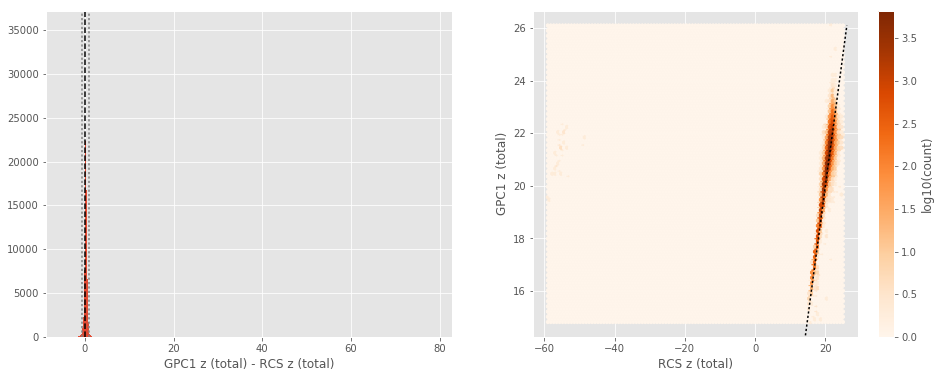

GPC1 z (aperture) - CFHT Megacam z (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.24
- 1% percentile: -2.4983787155151367
- 99% percentile: 1.8417782592773433


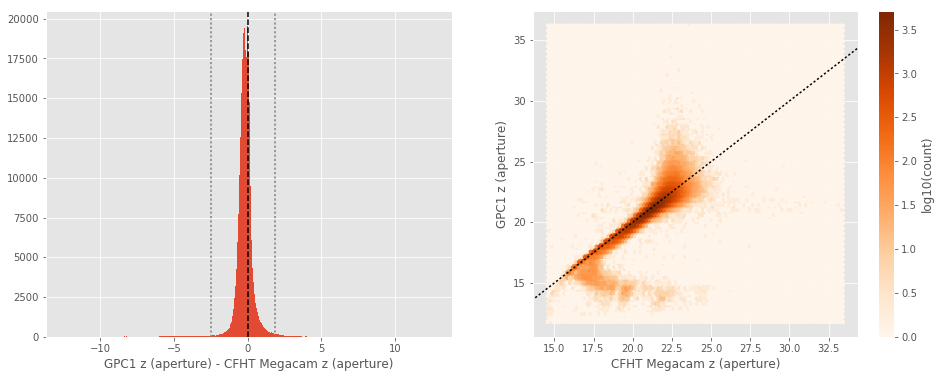

GPC1 z (total) - CFHT Megacam z (total):
- Median: 0.15
- Median Absolute Deviation: 0.13
- 1% percentile: -1.7105945587158204
- 99% percentile: 0.9008941650390576


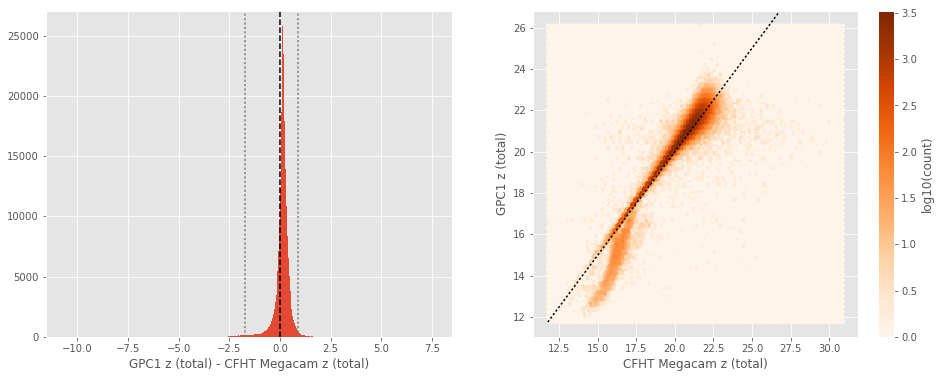

No sources have both RCS y (aperture) and GPC1 y (aperture) values.
GPC1 y (total) - RCS y (total):
- Median: -0.35
- Median Absolute Deviation: 0.29
- 1% percentile: -1.709545249938965
- 99% percentile: 0.692159347534179


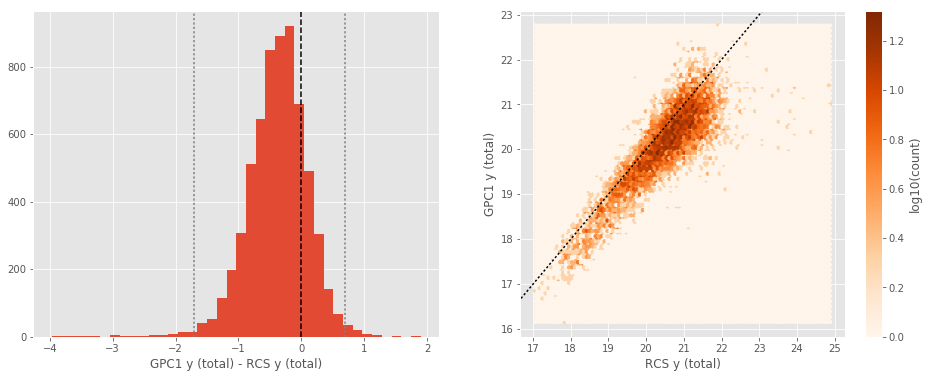

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Lockman-SWIRE.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5710824012756348
- 99% percentile: 0.7945964813232422


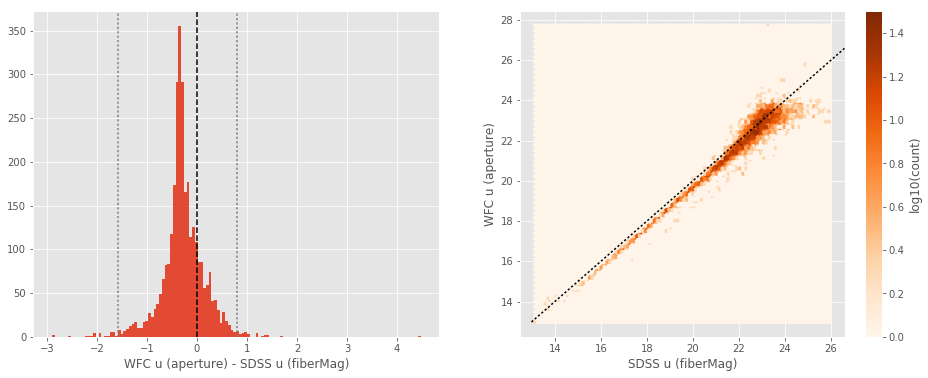

WFC u (total) - SDSS u (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5710824012756348
- 99% percentile: 0.7945964813232422


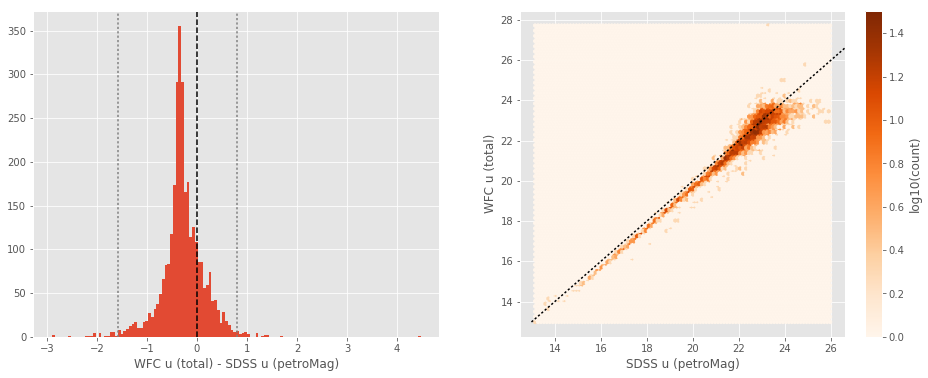

CFHT Megacam u (aperture) - SDSS u (fiberMag):
- Median: 0.01
- Median Absolute Deviation: 0.52
- 1% percentile: -1.7244149017333983
- 99% percentile: 3.0332967376708986


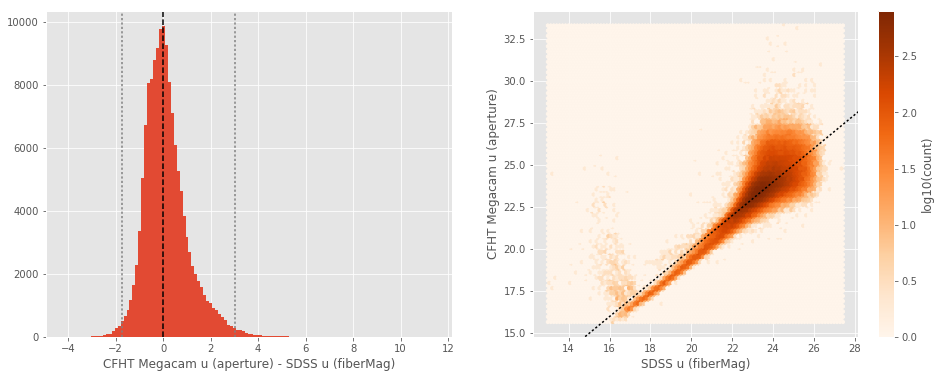

CFHT Megacam u (total) - SDSS u (petroMag):
- Median: 0.01
- Median Absolute Deviation: 0.52
- 1% percentile: -1.7244149017333983
- 99% percentile: 3.0332967376708986


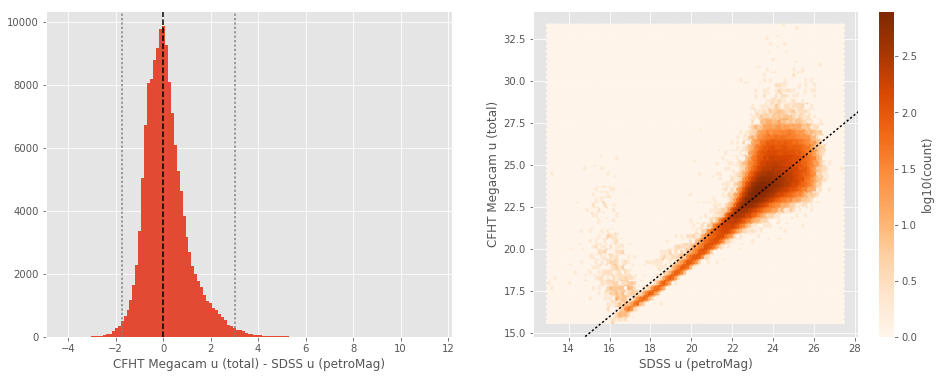

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1531206893920898
- 99% percentile: 0.42618650436401384


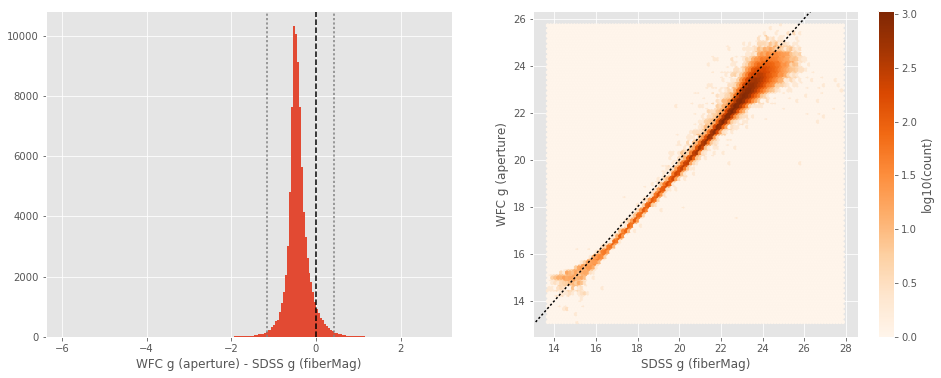

WFC g (total) - SDSS g (petroMag):
- Median: -0.45
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1531206893920898
- 99% percentile: 0.42618650436401384


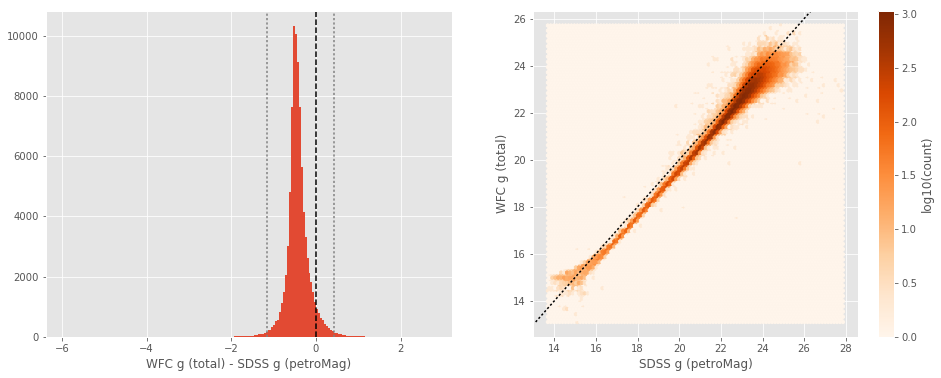

No sources have both SDSS g (fiberMag) and RCS g (aperture) values.
No sources have both SDSS g (petroMag) and RCS g (total) values.
CFHT Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1000246047973632
- 99% percentile: 1.2589447402954057


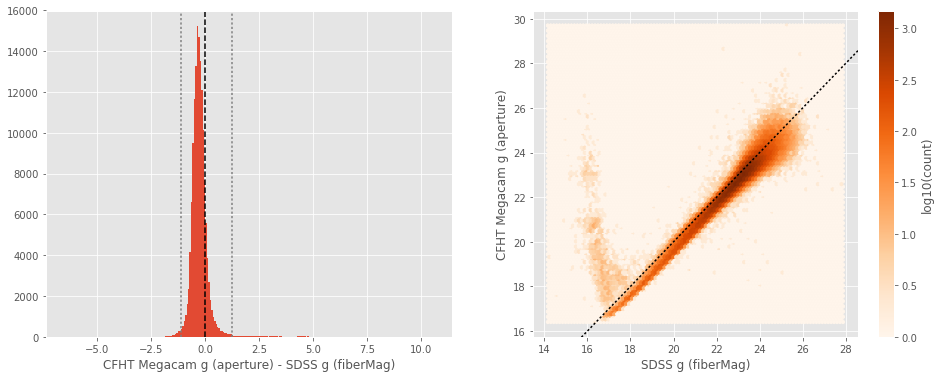

CFHT Megacam g (total) - SDSS g (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1000246047973632
- 99% percentile: 1.2589447402954057


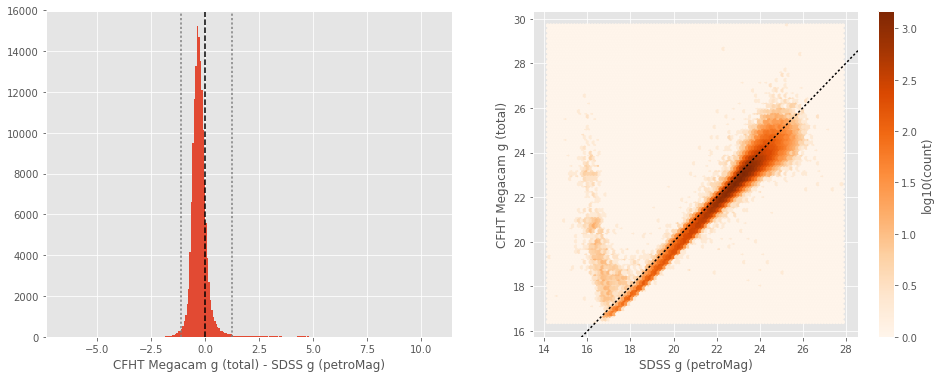

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.54
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8682982444763183
- 99% percentile: 1.794014415740968


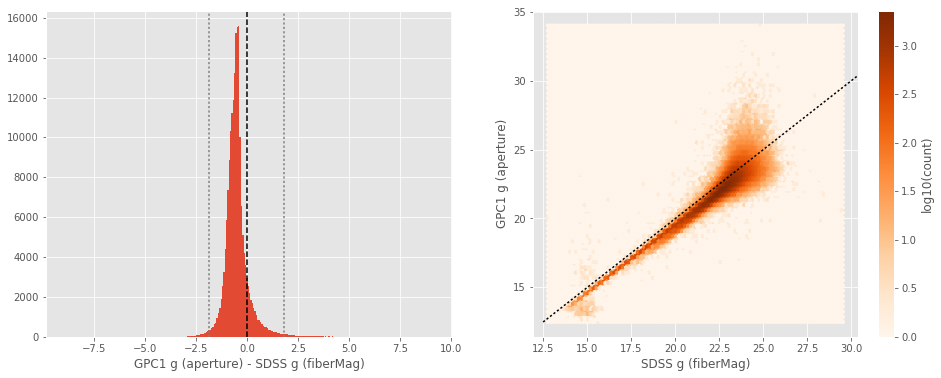

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.54
- Median Absolute Deviation: 0.24
- 1% percentile: -1.8682982444763183
- 99% percentile: 1.794014415740968


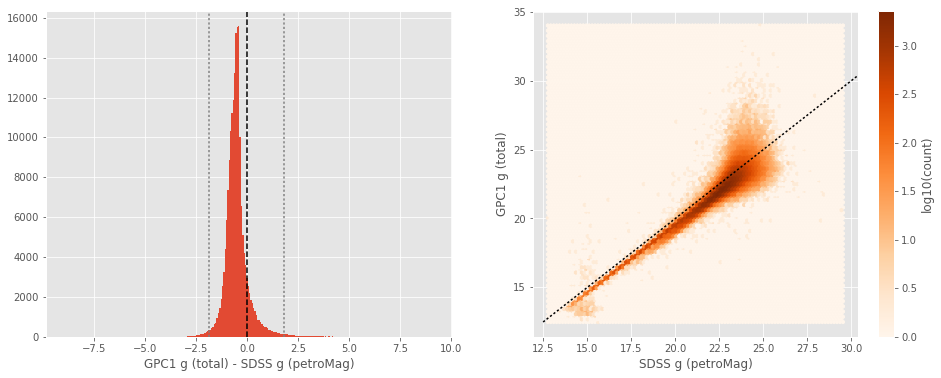

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9245457077026367
- 99% percentile: 0.32145620346069204


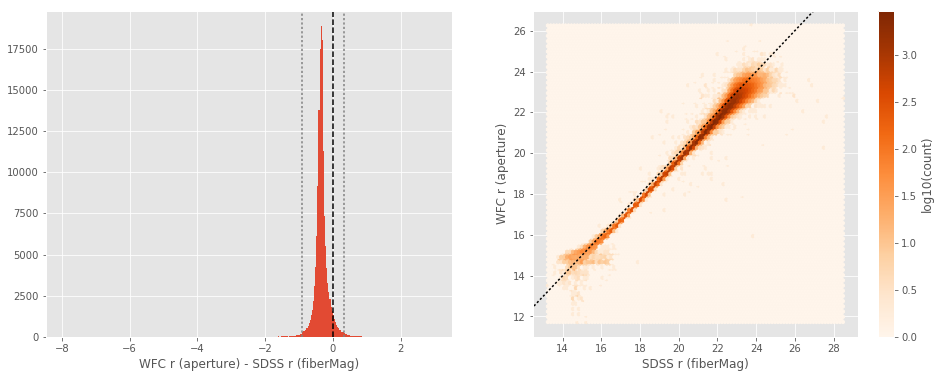

WFC r (total) - SDSS r (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9245457077026367
- 99% percentile: 0.32145620346069204


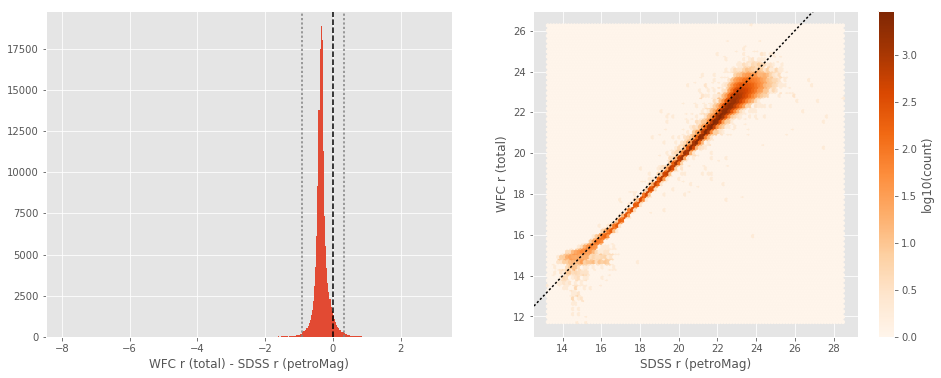

No sources have both SDSS r (fiberMag) and RCS r (aperture) values.
No sources have both SDSS r (petroMag) and RCS r (total) values.
CFHT Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.13
- 1% percentile: -0.85657958984375
- 99% percentile: 2.3280612945557015


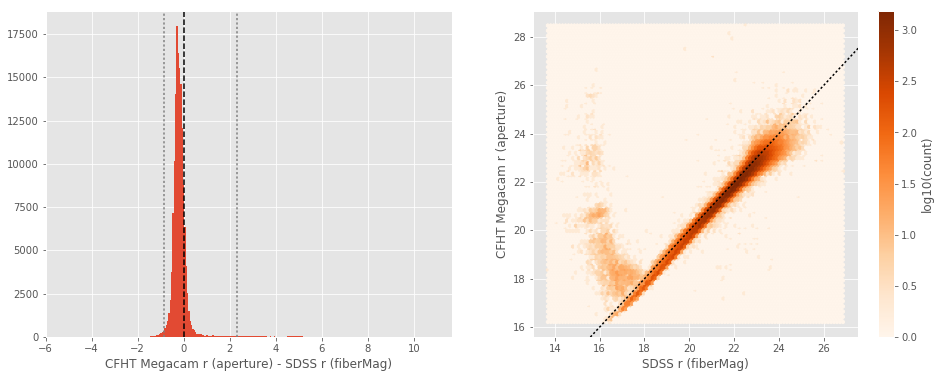

CFHT Megacam r (total) - SDSS r (petroMag):
- Median: -0.21
- Median Absolute Deviation: 0.13
- 1% percentile: -0.85657958984375
- 99% percentile: 2.3280612945557015


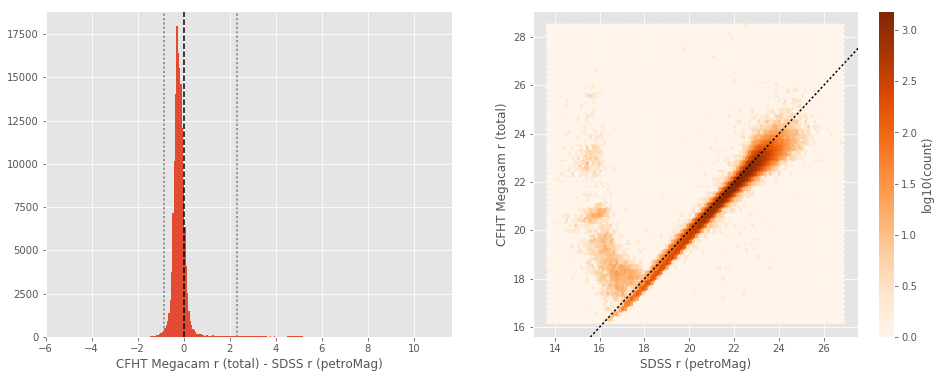

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1833213043212891
- 99% percentile: 0.7033475494384753


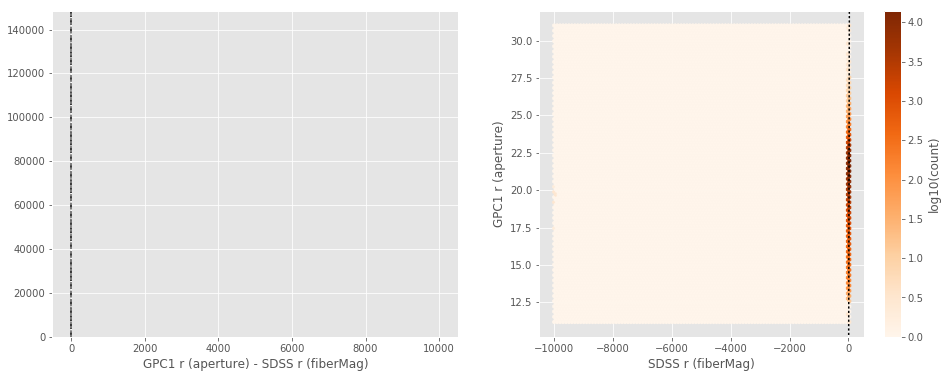

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.42
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1833213043212891
- 99% percentile: 0.7033475494384753


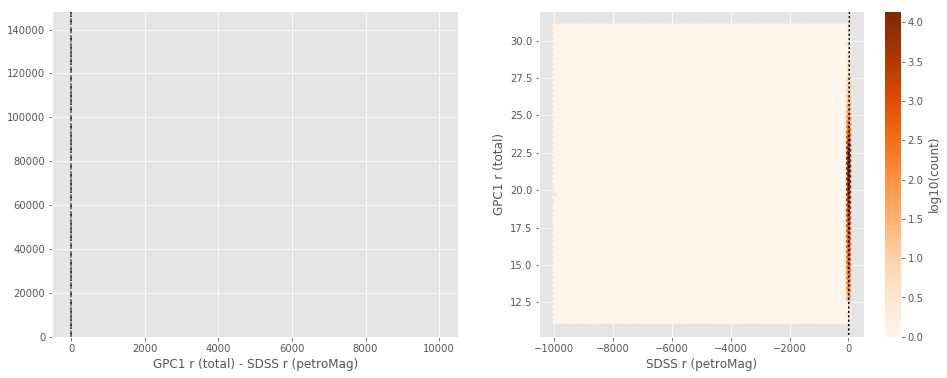

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9962200164794922
- 99% percentile: 0.3547430038452155


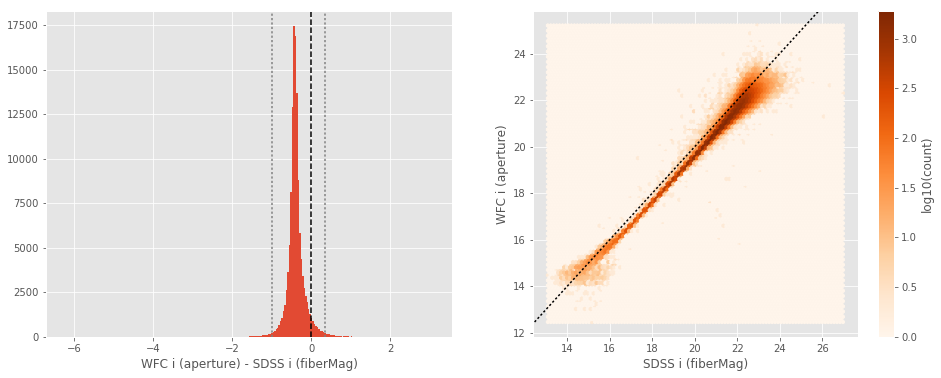

WFC i (total) - SDSS i (petroMag):
- Median: -0.41
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9962200164794922
- 99% percentile: 0.3547430038452155


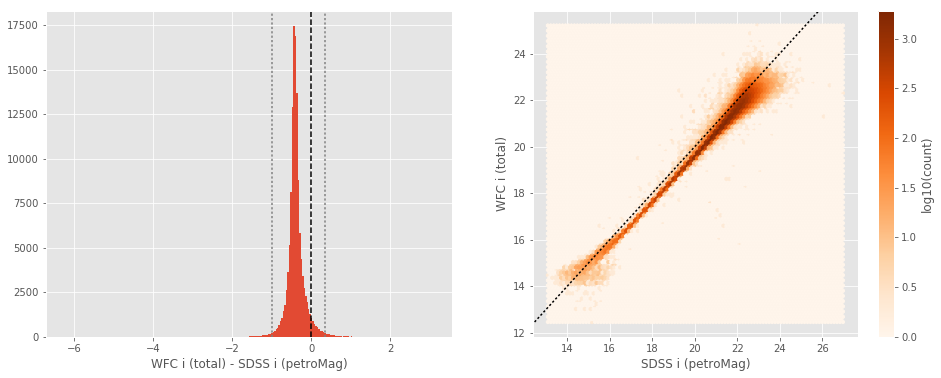

No sources have both SDSS i (fiberMag) and RCS i (aperture) values.
No sources have both SDSS i (petroMag) and RCS i (total) values.
GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0375835609436035
- 99% percentile: 0.48758485794067447


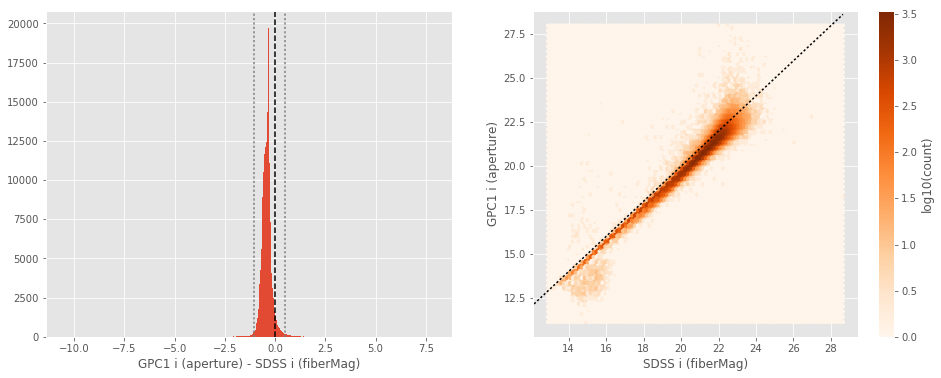

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.41
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0375835609436035
- 99% percentile: 0.48758485794067447


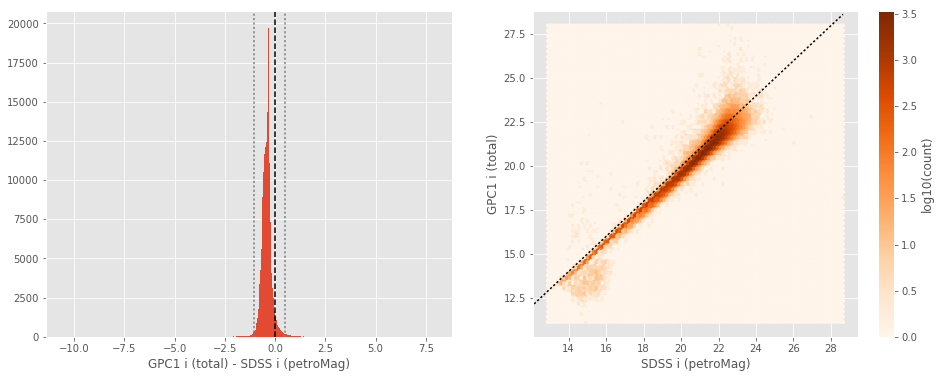

WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.12
- 1% percentile: -1.2592236328125
- 99% percentile: 0.6335509490966799


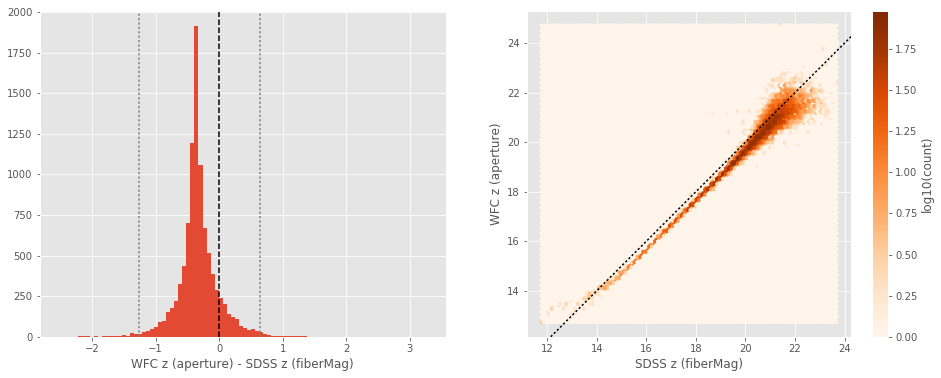

WFC z (total) - SDSS z (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.12
- 1% percentile: -1.2592236328125
- 99% percentile: 0.6335509490966799


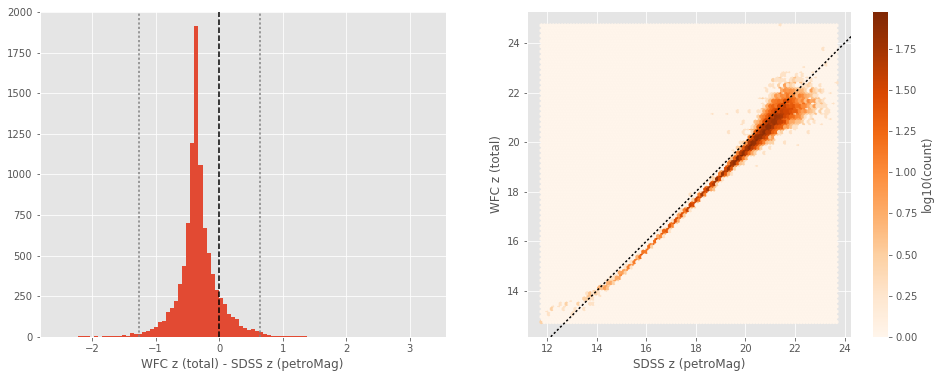

No sources have both SDSS z (fiberMag) and RCS z (aperture) values.
No sources have both SDSS z (petroMag) and RCS z (total) values.
CFHT Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.15
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1121234893798828
- 99% percentile: 2.766660690307617


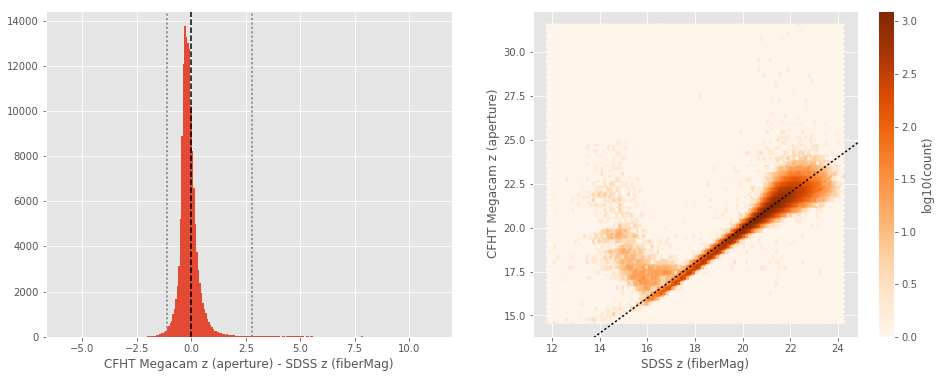

CFHT Megacam z (total) - SDSS z (petroMag):
- Median: -0.15
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1121234893798828
- 99% percentile: 2.766660690307617


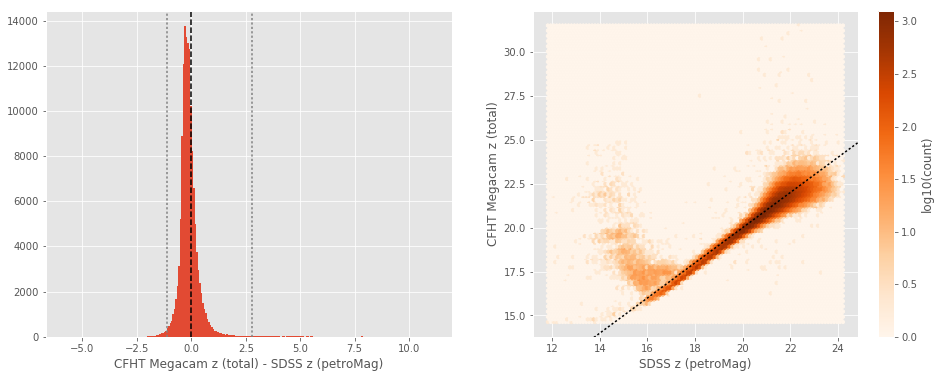

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2946042251586913
- 99% percentile: 1.2326162338256823


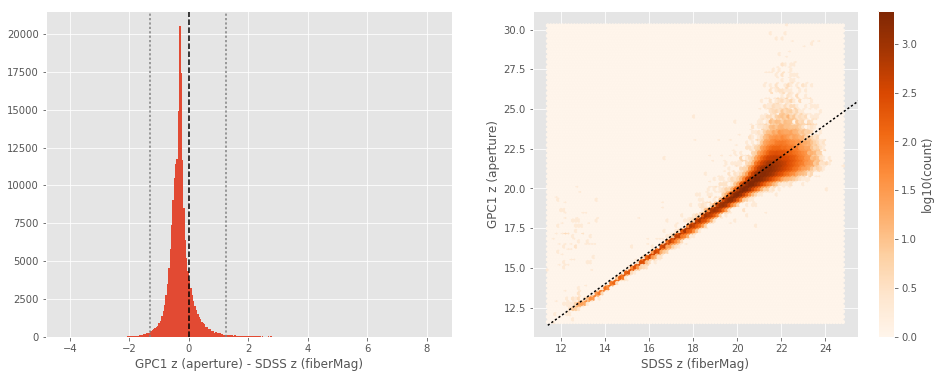

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2946042251586913
- 99% percentile: 1.2326162338256823


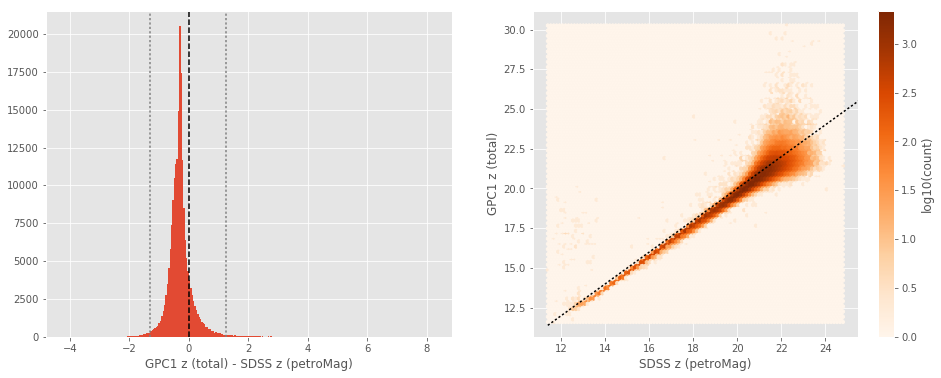

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Lockman-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.02
- Median Absolute Deviation: 0.06
- 1% percentile: -0.8742653710843861
- 99% percentile: 0.779014798898522


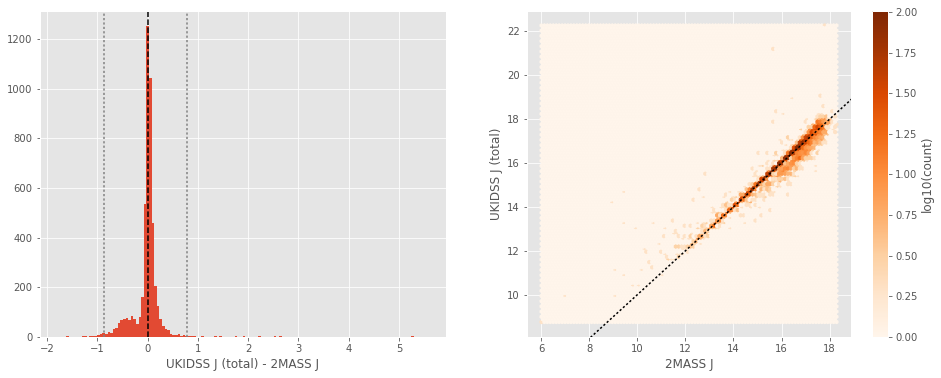

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.07
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8243777712114841
- 99% percentile: 0.8419315067426179


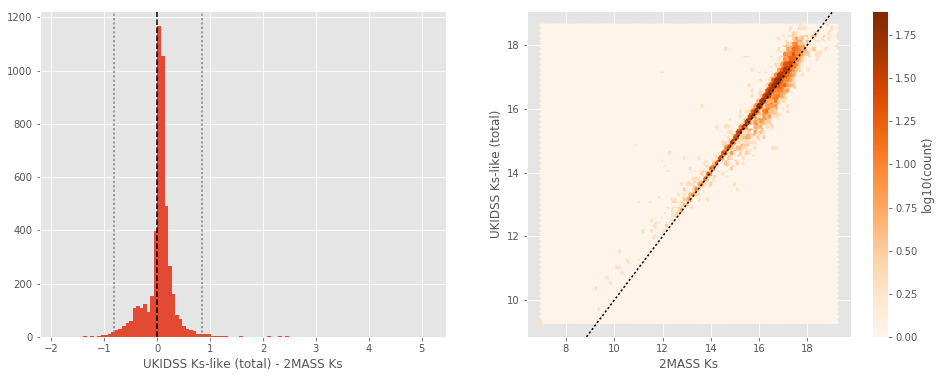

In [16]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [17]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 2456857 / 4641777 (52.93%)


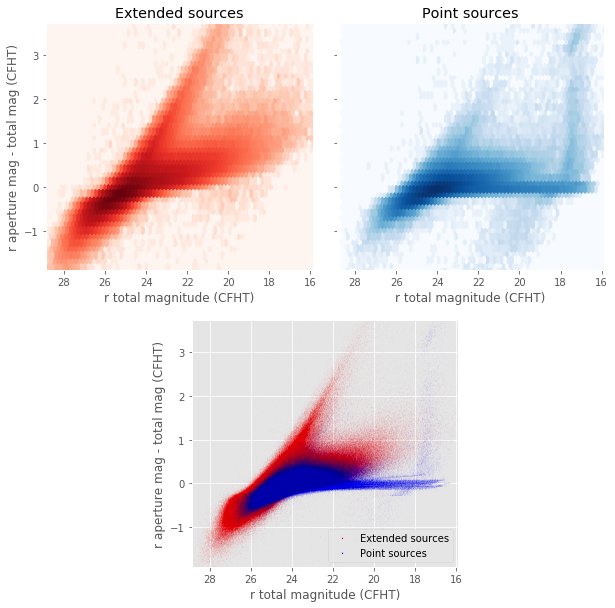

In [18]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_r'],
    master_catalogue['m_ap_cfht_megacam_r'] - master_catalogue['m_cfht_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 78472 / 4641777 (1.69%)


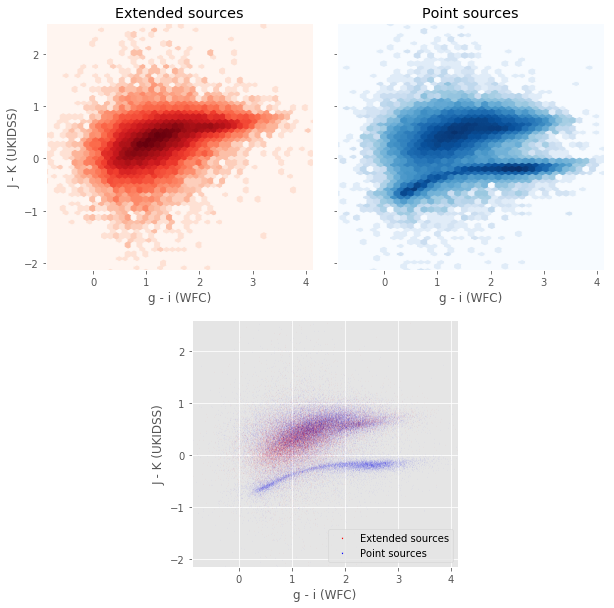

In [19]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (WFC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 129249 / 4641777 (2.78%)


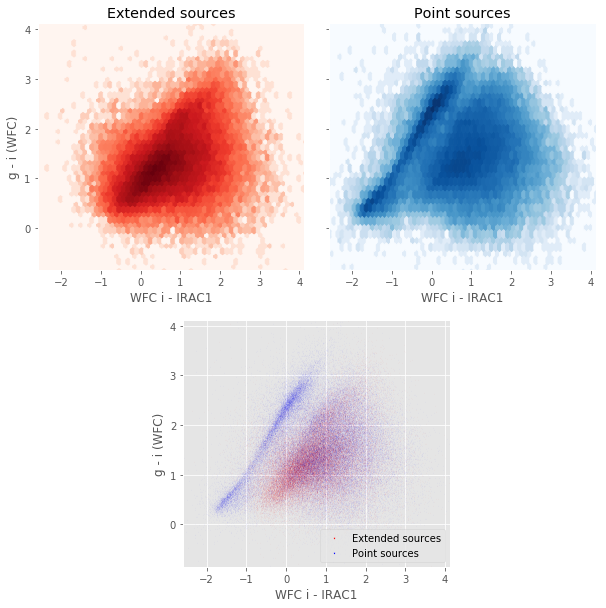

In [20]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 2070789 / 4641777 (44.61%)


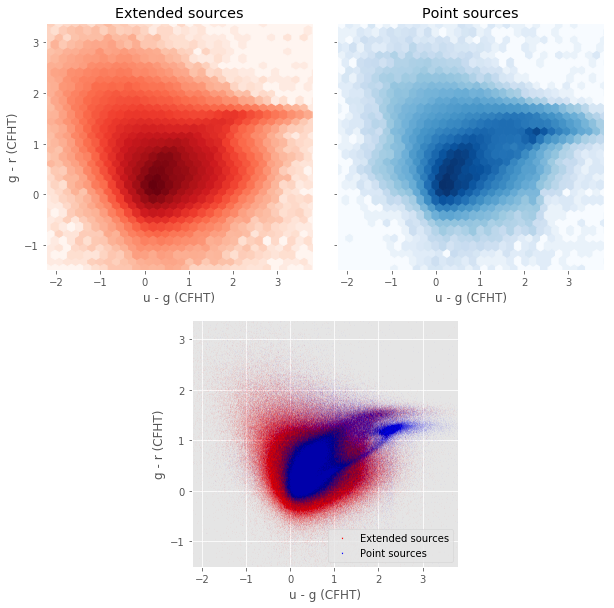

In [21]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_u'] - master_catalogue['m_cfht_megacam_g'],
    master_catalogue['m_cfht_megacam_g'] - master_catalogue['m_cfht_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 101321 / 4641777 (2.18%)


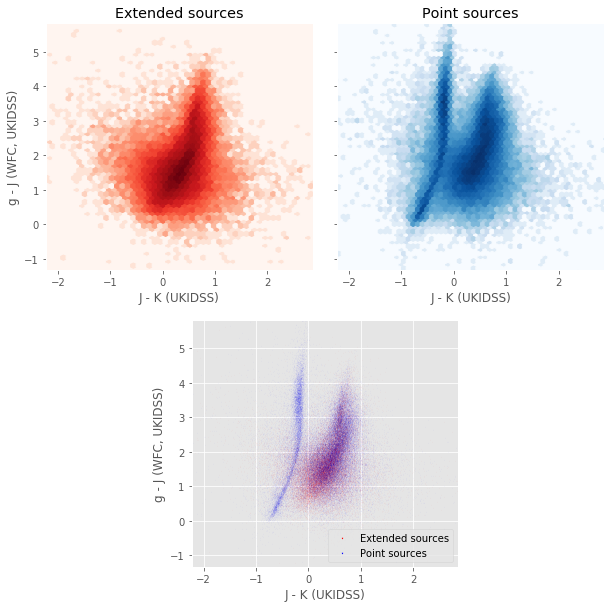

In [22]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (WFC, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 9237 / 4641777 (0.20%)


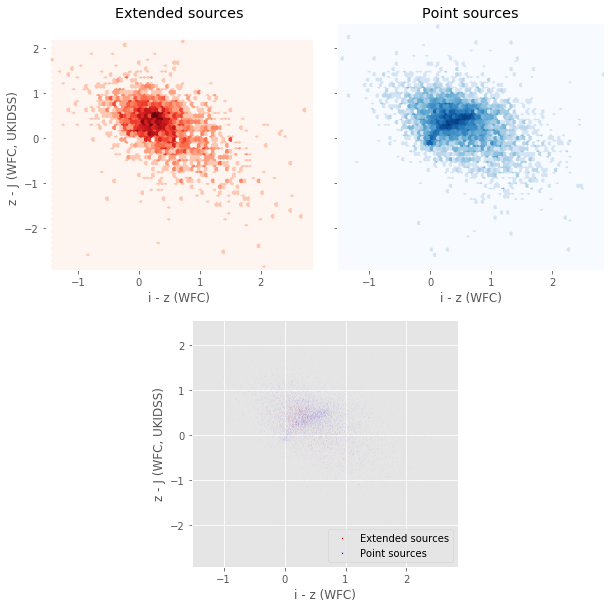

In [23]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_z'],
    master_catalogue['m_wfc_z'] - master_catalogue['m_ukidss_j'],
    "i - z (WFC)", "z - J (WFC, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 38805 / 4641777 (0.84%)


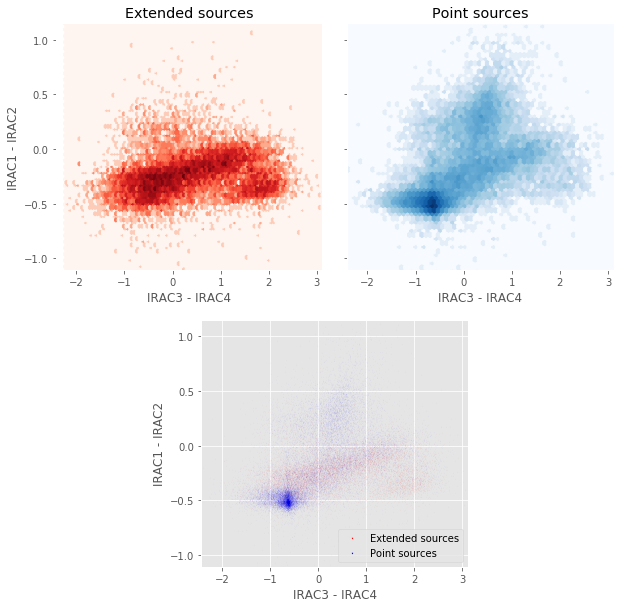

In [24]:
nb_ccplots(
    master_catalogue['m_irac3'] - master_catalogue['m_irac4'],
    master_catalogue['m_irac1'] - master_catalogue['m_irac2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)